In [1]:
import numpy as np
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, precision_recall_fscore_support
import seaborn as sns
import matplotlib.pyplot as plt

In [2]:
credit_data = pd.read_csv("C:/Users/HP/Documents/creditcard.csv")

In [3]:
credit_data.head()

,Time,V1,V2,V3,V4,V5,V6,V7,V8,V9,...,V21,V22,V23,V24,V25,V26,V27,V28,Amount,Class
0,0.0,-1.359807,-0.072781,2.536347,1.378155,-0.338321,0.462388,0.239599,0.098698,0.363787,...,-0.018307,0.277838,-0.110474,0.066928,0.128539,-0.189115,0.133558,-0.021053,149.62,0
1,0.0,1.191857,0.266151,0.166480,0.448154,0.060018,-0.082361,-0.078803,0.085102,-0.255425,...,-0.225775,-0.638672,0.101288,-0.339846,0.167170,0.125895,-0.008983,0.014724,2.69,0
2,1.0,-1.358354,-1.340163,1.773209,0.379780,-0.503198,1.800499,0.791461,0.247676,-1.514654,...,0.247998,0.771679,0.909412,-0.689281,-0.327642,-0.139097,-0.055353,-0.059752,378.66,0
3,1.0,-0.966272,-0.185226,1.792993,-0.863291,-0.010309,1.247203,0.237609,0.377436,-1.387024,...,-0.108300,0.005274,-0.190321,-1.175575,0.647376,-0.221929,0.062723,0.061458,123.50,0
4,2.0,-1.158233,0.877737,1.548718,0.403034,-0.407193,0.095921,0.592941,-0.270533,0.817739,...,-0.009431,0.798278,-0.137458,0.141267,-0.206010,0.502292,0.219422,0.215153,69.99,0


In [4]:
credit_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 284807 entries, 0 to 284806
Data columns (total 31 columns):
 #   Column  Non-Null Count   Dtype  
---  ------  --------------   -----  
 0   Time    284807 non-null  float64
 1   V1      284807 non-null  float64
 2   V2      284807 non-null  float64
 3   V3      284807 non-null  float64
 4   V4      284807 non-null  float64
 5   V5      284807 non-null  float64
 6   V6      284807 non-null  float64
 7   V7      284807 non-null  float64
 8   V8      284807 non-null  float64
 9   V9      284807 non-null  float64
 10  V10     284807 non-null  float64
 11  V11     284807 non-null  float64
 12  V12     284807 non-null  float64
 13  V13     284807 non-null  float64
 14  V14     284807 non-null  float64
 15  V15     284807 non-null  float64
 16  V16     284807 non-null  float64
 17  V17     284807 non-null  float64
 18  V18     284807 non-null  float64
 19  V19     284807 non-null  float64
 20  V20     284807 non-null  float64
 21  V21     28

In [5]:
credit_data.shape

(284807, 31)

In [6]:
# checking for null values
credit_data.isnull().sum()

Time      0
V1        0
V2        0
V3        0
V4        0
V5        0
V6        0
V7        0
V8        0
V9        0
V10       0
V11       0
V12       0
V13       0
V14       0
V15       0
V16       0
V17       0
V18       0
V19       0
V20       0
V21       0
V22       0
V23       0
V24       0
V25       0
V26       0
V27       0
V28       0
Amount    0
Class     0
dtype: int64

In [7]:
# distribution of transactions
credit_data['Class'].value_counts()

0    284315
1       492
Name: Class, dtype: int64

In [8]:
# this is not a balanced dataset. 0-> normal ; 1 -> fraudulent transaction

In [9]:
legit = credit_data[credit_data.Class == 0]
fraud = credit_data[credit_data.Class == 1]

In [10]:
# let us now see some statistical measures of the data
legit.Amount.describe()

count    284315.000000
mean         88.291022
std         250.105092
min           0.000000
25%           5.650000
50%          22.000000
75%          77.050000
max       25691.160000
Name: Amount, dtype: float64

In [11]:
fraud.Amount.describe()

count     492.000000
mean      122.211321
std       256.683288
min         0.000000
25%         1.000000
50%         9.250000
75%       105.890000
max      2125.870000
Name: Amount, dtype: float64

In [12]:
# comparison of the values
credit_data.groupby('Class').mean()

,Time,V1,V2,V3,V4,V5,V6,V7,V8,V9,...,V20,V21,V22,V23,V24,V25,V26,V27,V28,Amount
Class,,,,,,,,,,,,,,,,,,,,,
0,94838.202258,0.008258,-0.006271,0.012171,-0.007860,0.005453,0.002419,0.009637,-0.000987,0.004467,...,-0.000644,-0.001235,-0.000024,0.000070,0.000182,-0.000072,-0.000089,-0.000295,-0.000131,88.291022
1,80746.806911,-4.771948,3.623778,-7.033281,4.542029,-3.151225,-1.397737,-5.568731,0.570636,-2.581123,...,0.372319,0.713588,0.014049,-0.040308,-0.105130,0.041449,0.051648,0.170575,0.075667,122.211321


<Axes: xlabel='Class', ylabel='count'>

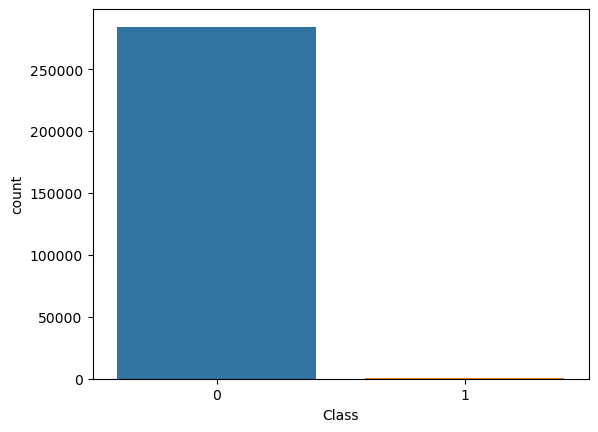

In [13]:
sns.countplot(credit_data, x="Class")

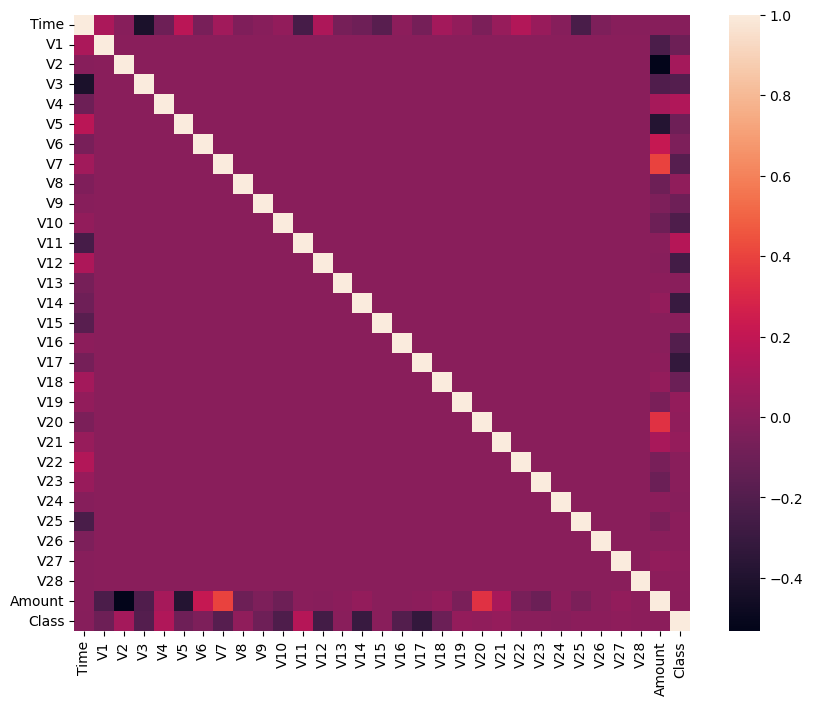

In [14]:
# Correlation matrix 
corrRel = credit_data.corr() 
fig = plt.figure(figsize = (10, 8)) 
sns.heatmap(corrRel, square = True) 
plt.show() 

In [15]:
# UnderSampling of unbalanced data

In [16]:
legit_new = legit.sample(n=492)

In [17]:
# combining two data-frames each of 492 values
new_credit = pd.concat([legit_new, fraud], axis=0)

In [18]:
new_credit.head()

,Time,V1,V2,V3,V4,V5,V6,V7,V8,V9,...,V21,V22,V23,V24,V25,V26,V27,V28,Amount,Class
166920,118382.0,-0.896218,0.155924,1.795052,-1.005149,0.369472,-0.010402,0.590675,-0.262292,0.667701,...,-0.256844,-0.422979,0.093755,-0.447494,-0.548140,0.213919,-0.601405,-0.360044,8.00,0
113109,72938.0,-0.859667,-0.298418,0.971311,-4.434924,-0.905078,-1.140555,0.339466,-0.142979,1.208148,...,-0.328216,-0.261243,-0.230427,-0.168832,0.130807,-1.075428,0.188875,0.199237,59.98,0
101307,67789.0,-0.428021,1.078215,1.707775,0.040807,-0.219468,-1.080816,0.719688,-0.095334,-0.438666,...,-0.206579,-0.522545,0.010919,0.696493,-0.234055,0.050561,0.267555,0.124333,0.89,0
58492,48412.0,-0.778318,-0.151856,1.104955,-2.787458,-0.389403,-0.938579,0.816461,-0.029623,-0.817286,...,-0.620071,-1.673240,0.058191,-0.150385,0.393736,-1.085797,0.020850,0.058377,91.00,0
11377,19846.0,1.165485,-0.430042,0.880939,-0.748765,-0.804945,0.191926,-0.887001,0.230580,2.971920,...,-0.106716,0.130447,-0.048438,-0.364179,0.389898,-0.691348,0.072448,0.012324,11.85,0


In [19]:
new_credit.tail()

,Time,V1,V2,V3,V4,V5,V6,V7,V8,V9,...,V21,V22,V23,V24,V25,V26,V27,V28,Amount,Class
279863,169142.0,-1.927883,1.125653,-4.518331,1.749293,-1.566487,-2.010494,-0.882850,0.697211,-2.064945,...,0.778584,-0.319189,0.639419,-0.294885,0.537503,0.788395,0.292680,0.147968,390.00,1
280143,169347.0,1.378559,1.289381,-5.004247,1.411850,0.442581,-1.326536,-1.413170,0.248525,-1.127396,...,0.370612,0.028234,-0.145640,-0.081049,0.521875,0.739467,0.389152,0.186637,0.76,1
280149,169351.0,-0.676143,1.126366,-2.213700,0.468308,-1.120541,-0.003346,-2.234739,1.210158,-0.652250,...,0.751826,0.834108,0.190944,0.032070,-0.739695,0.471111,0.385107,0.194361,77.89,1
281144,169966.0,-3.113832,0.585864,-5.399730,1.817092,-0.840618,-2.943548,-2.208002,1.058733,-1.632333,...,0.583276,-0.269209,-0.456108,-0.183659,-0.328168,0.606116,0.884876,-0.253700,245.00,1
281674,170348.0,1.991976,0.158476,-2.583441,0.408670,1.151147,-0.096695,0.223050,-0.068384,0.577829,...,-0.164350,-0.295135,-0.072173,-0.450261,0.313267,-0.289617,0.002988,-0.015309,42.53,1


In [20]:
new_credit['Class'].value_counts()

0    492
1    492
Name: Class, dtype: int64

In [21]:
new_credit.groupby('Class').mean()

,Time,V1,V2,V3,V4,V5,V6,V7,V8,V9,...,V20,V21,V22,V23,V24,V25,V26,V27,V28,Amount
Class,,,,,,,,,,,,,,,,,,,,,
0,93560.613821,0.025685,-0.013360,0.092464,-0.064258,-0.054315,-0.014156,0.028797,-0.071796,0.019186,...,-0.036515,-0.037515,-0.001260,-0.024371,-0.014484,0.002167,0.023775,-0.016842,-0.000975,87.717459
1,80746.806911,-4.771948,3.623778,-7.033281,4.542029,-3.151225,-1.397737,-5.568731,0.570636,-2.581123,...,0.372319,0.713588,0.014049,-0.040308,-0.105130,0.041449,0.051648,0.170575,0.075667,122.211321


In [22]:
# Splitting the data

X = new_credit.drop(columns = 'Class', axis=1)
Y = new_credit['Class']

In [23]:
X

,Time,V1,V2,V3,V4,V5,V6,V7,V8,V9,...,V20,V21,V22,V23,V24,V25,V26,V27,V28,Amount
166920,118382.0,-0.896218,0.155924,1.795052,-1.005149,0.369472,-0.010402,0.590675,-0.262292,0.667701,...,-0.258168,-0.256844,-0.422979,0.093755,-0.447494,-0.548140,0.213919,-0.601405,-0.360044,8.00
113109,72938.0,-0.859667,-0.298418,0.971311,-4.434924,-0.905078,-1.140555,0.339466,-0.142979,1.208148,...,-0.667330,-0.328216,-0.261243,-0.230427,-0.168832,0.130807,-1.075428,0.188875,0.199237,59.98
101307,67789.0,-0.428021,1.078215,1.707775,0.040807,-0.219468,-1.080816,0.719688,-0.095334,-0.438666,...,0.089275,-0.206579,-0.522545,0.010919,0.696493,-0.234055,0.050561,0.267555,0.124333,0.89
58492,48412.0,-0.778318,-0.151856,1.104955,-2.787458,-0.389403,-0.938579,0.816461,-0.029623,-0.817286,...,-0.415610,-0.620071,-1.673240,0.058191,-0.150385,0.393736,-1.085797,0.020850,0.058377,91.00
11377,19846.0,1.165485,-0.430042,0.880939,-0.748765,-0.804945,0.191926,-0.887001,0.230580,2.971920,...,-0.202549,-0.106716,0.130447,-0.048438,-0.364179,0.389898,-0.691348,0.072448,0.012324,11.85
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
279863,169142.0,-1.927883,1.125653,-4.518331,1.749293,-1.566487,-2.010494,-0.882850,0.697211,-2.064945,...,1.252967,0.778584,-0.319189,0.639419,-0.294885,0.537503,0.788395,0.292680,0.147968,390.00
280143,169347.0,1.378559,1.289381,-5.004247,1.411850,0.442581,-1.326536,-1.413170,0.248525,-1.127396,...,0.226138,0.370612,0.028234,-0.145640,-0.081049,0.521875,0.739467,0.389152,0.186637,0.76
280149,169351.0,-0.676143,1.126366,-2.213700,0.468308,-1.120541,-0.003346,-2.234739,1.210158,-0.652250,...,0.247968,0.751826,0.834108,0.190944,0.032070,-0.739695,0.471111,0.385107,0.194361,77.89
281144,169966.0,-3.113832,0.585864,-5.399730,1.817092,-0.840618,-2.943548,-2.208002,1.058733,-1.632333,...,0.306271,0.583276,-0.269209,-0.456108,-0.183659,-0.328168,0.606116,0.884876,-0.253700,245.00


In [24]:
Y

166920    0
113109    0
101307    0
58492     0
11377     0
         ..
279863    1
280143    1
280149    1
281144    1
281674    1
Name: Class, Length: 984, dtype: int64

In [25]:
# Splitting the data into TRAINING & TEST Data
X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size=0.2, stratify=Y, random_state=3)

In [26]:
X_train.shape, X_test.shape, X.shape

((787, 30), (197, 30), (984, 30))

In [27]:
#Logistic Regression Model

model = LogisticRegression(max_iter = 200)

In [28]:
# training the model with training data
model.fit(X_train, Y_train)

LogisticRegression(max_iter=200)

In [29]:
# Accuracy on Training data
X_train_prediction = model.predict(X_train)
train_accuracy = accuracy_score(X_train_prediction, Y_train)

In [30]:
print("Accuracy on Training data: ", train_accuracy)

Accuracy on Training data:  0.9529860228716646


In [31]:
# Accuracy on Test data
X_test_prediction = model.predict(X_test)
test_accuracy = accuracy_score(X_test_prediction, Y_test)

In [32]:
    print("Accuracy on Test data: ", test_accuracy)

Accuracy on Test data:  0.9543147208121827


In [33]:
# Precision, Recall, F-score, Support on training data

precision, recall, fscore, support = precision_recall_fscore_support(Y_train, X_train_prediction)
print(f"On training data: Precision = {precision}, Recall = {recall}, F-score = {fscore}, Support = {support}")

On training data: Precision = [0.92583732 0.98373984], Recall = [0.98473282 0.9213198 ], F-score = [0.95437731 0.95150721], Support = [393 394]


In [34]:
# Precision, Recall, F-score, Support on test data

precision2, recall2, fscore2, support2 = precision_recall_fscore_support(Y_test, X_test_prediction)
print(f"On test data: Precision = {precision2}, Recall = {recall2}, F-score = {fscore2}, Support = {support2}")

On test data: Precision = [0.93269231 0.97849462], Recall = [0.97979798 0.92857143], F-score = [0.95566502 0.95287958], Support = [99 98]
